In [1]:
import math
import matplotlib
import numpy as np
import sklearn

matplotlib.__version__,np.__version__,sklearn.__version__

('3.0.3', '1.16.3', '0.21.1')

In [2]:
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
np.random.seed(222)
X, y = make_classification(
    n_samples=10000, 
    n_features=10,
    n_informative=10,
    n_redundant=0,
    weights=[0.3,0.7],
    class_sep=0.7,
    flip_y=0.35) # the default value for flip_y is 0.01, or 1%
X_train, _ , y_train, _ = train_test_split(X, y, test_size=0.25)

In [4]:
X.mean(),y.mean()

(-0.11833617463992567, 0.6342)

In [5]:
np.random.seed(222)
X, y = make_classification(
    n_samples=10000, 
    n_features=10,
    n_informative=10,
    n_redundant=0,
    weights=[0.3,0.7],
    class_sep=0.7,
    flip_y=0.0)
_, X_test , _ , y_test = train_test_split(X, y, test_size=0.25)

In [6]:
X.mean(),y.mean()

(-0.11833617463992567, 0.7)

In [7]:
pipeline = Pipeline([
    ('prep',MinMaxScaler()),
    ('clf',SVC())
])

## linear kernel

In [8]:
param_grid1 = [
    {
        'clf__kernel': ['linear'],
        'clf__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'clf__gamma':['auto']
    }
]

<Figure size 432x288 with 0 Axes>

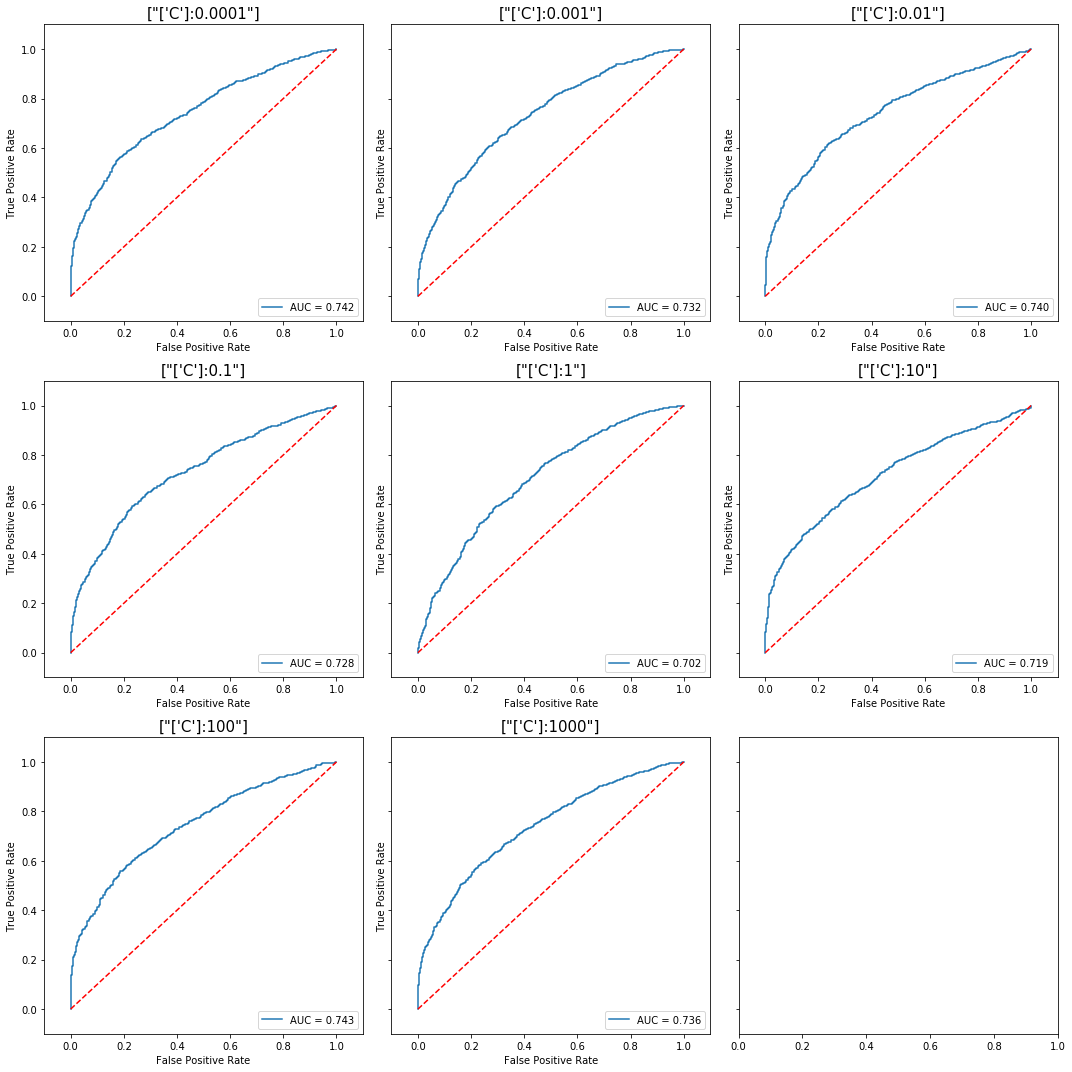

CPU times: user 2min 24s, sys: 1.5 s, total: 2min 26s
Wall time: 2min 24s


In [22]:
%%time
num_cols = 3
num_rows = math.ceil(len(ParameterGrid(param_grid1)) / num_cols)

# create a single figure
plt.clf()
fig,axes = plt.subplots(num_rows,num_cols,sharey=True)
fig.set_size_inches(num_cols*5,num_rows*5)

for i,g in enumerate(ParameterGrid(param_grid1)):

    pipeline.set_params(**g)
    pipeline.fit(X_train,y_train)

    y_preds = pipeline.decision_function(X_test)
    
    # fpr means false-positive-rate
    # tpr means true-positive-rate
    fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)

    auc_score = metrics.auc(fpr, tpr)

    ax = axes[i // num_cols, i % num_cols]

    # don't print the whole name or it won't fit
    ax.set_title(str([r"{}:{}".format(
        k.split('__')[1:],v) for k,v in g.items() if "gamma" not in k and "kernel" not in k]),fontsize=15)
    ax.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
    ax.legend(loc='lower right')

    # it's helpful to add a diagonal to indicate where chance 
    # scores lie (i.e. just flipping a coin)
    ax.plot([0,1],[0,1],'r--')

    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

plt.gcf().tight_layout()
plt.show()

## polynomial kernel degree=2

In [10]:
param_grid2 = [
    {
        'clf__kernel': ['poly'],
        'clf__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'clf__degree':[2],
        'clf__gamma':['auto']
    }
]

<Figure size 432x288 with 0 Axes>

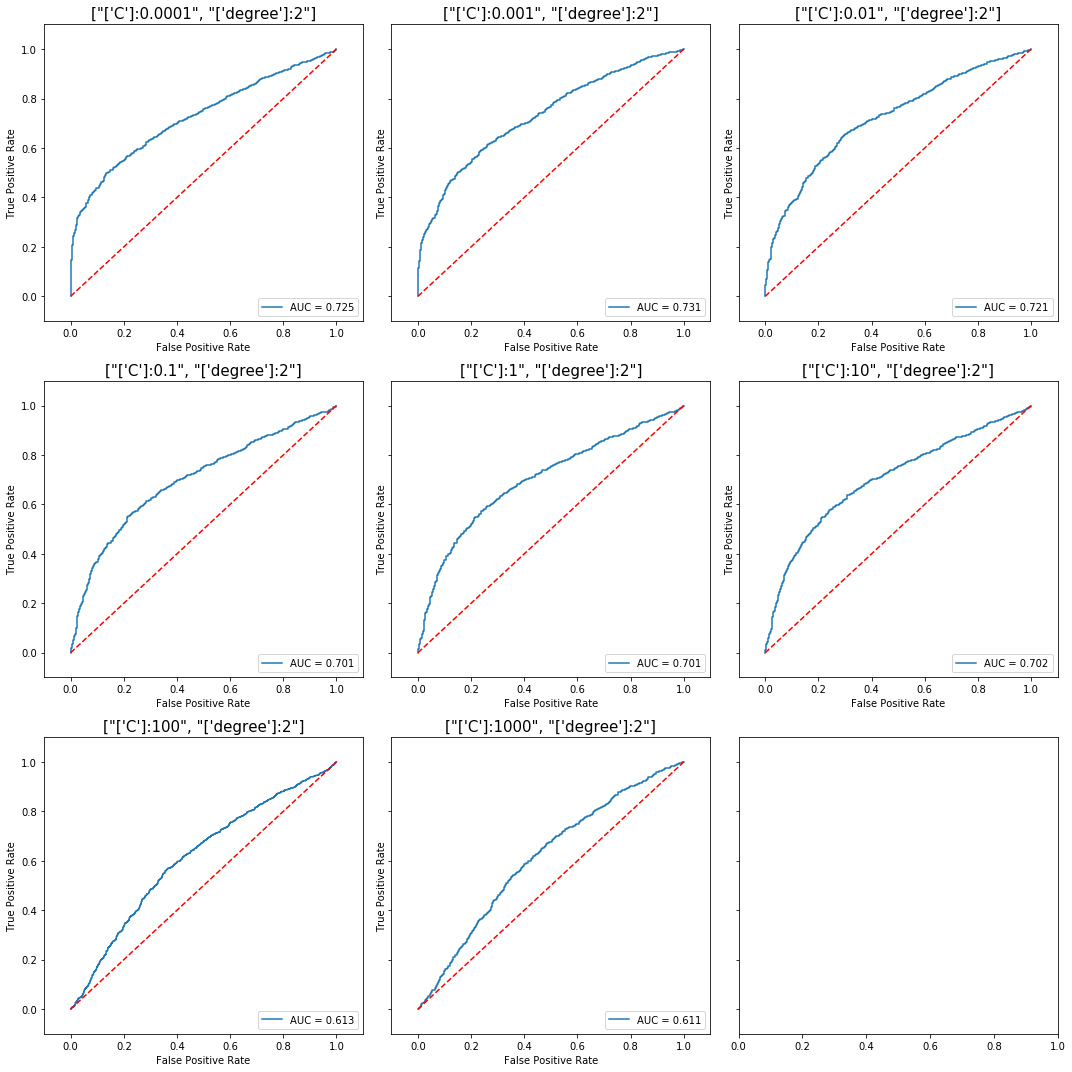

CPU times: user 14 s, sys: 1.62 s, total: 15.6 s
Wall time: 14.1 s


In [23]:
%%time
num_cols = 3
num_rows = math.ceil(len(ParameterGrid(param_grid2)) / num_cols)

# create a single figure
plt.clf()
fig,axes = plt.subplots(num_rows,num_cols,sharey=True)
fig.set_size_inches(num_cols*5,num_rows*5)

for i,g in enumerate(ParameterGrid(param_grid2)):

    pipeline.set_params(**g)
    pipeline.fit(X_train,y_train)

    y_preds = pipeline.decision_function(X_test)
    
    # fpr means false-positive-rate
    # tpr means true-positive-rate
    fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)

    auc_score = metrics.auc(fpr, tpr)

    ax = axes[i // num_cols, i % num_cols]

    # don't print the whole name or it won't fit
    ax.set_title(str([r"{}:{}".format(
        k.split('__')[1:],v) for k,v in g.items() if "gamma" not in k and "kernel" not in k]),fontsize=15)
    ax.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
    ax.legend(loc='lower right')

    # it's helpful to add a diagonal to indicate where chance 
    # scores lie (i.e. just flipping a coin)
    ax.plot([0,1],[0,1],'r--')

    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

plt.gcf().tight_layout()
plt.show()

## polynomial kernel, degree=3

In [12]:
param_grid3 = [
    {
        'clf__kernel': ['poly'],
        'clf__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'clf__degree':[3],
        'clf__gamma':['auto']
    }
]

<Figure size 432x288 with 0 Axes>

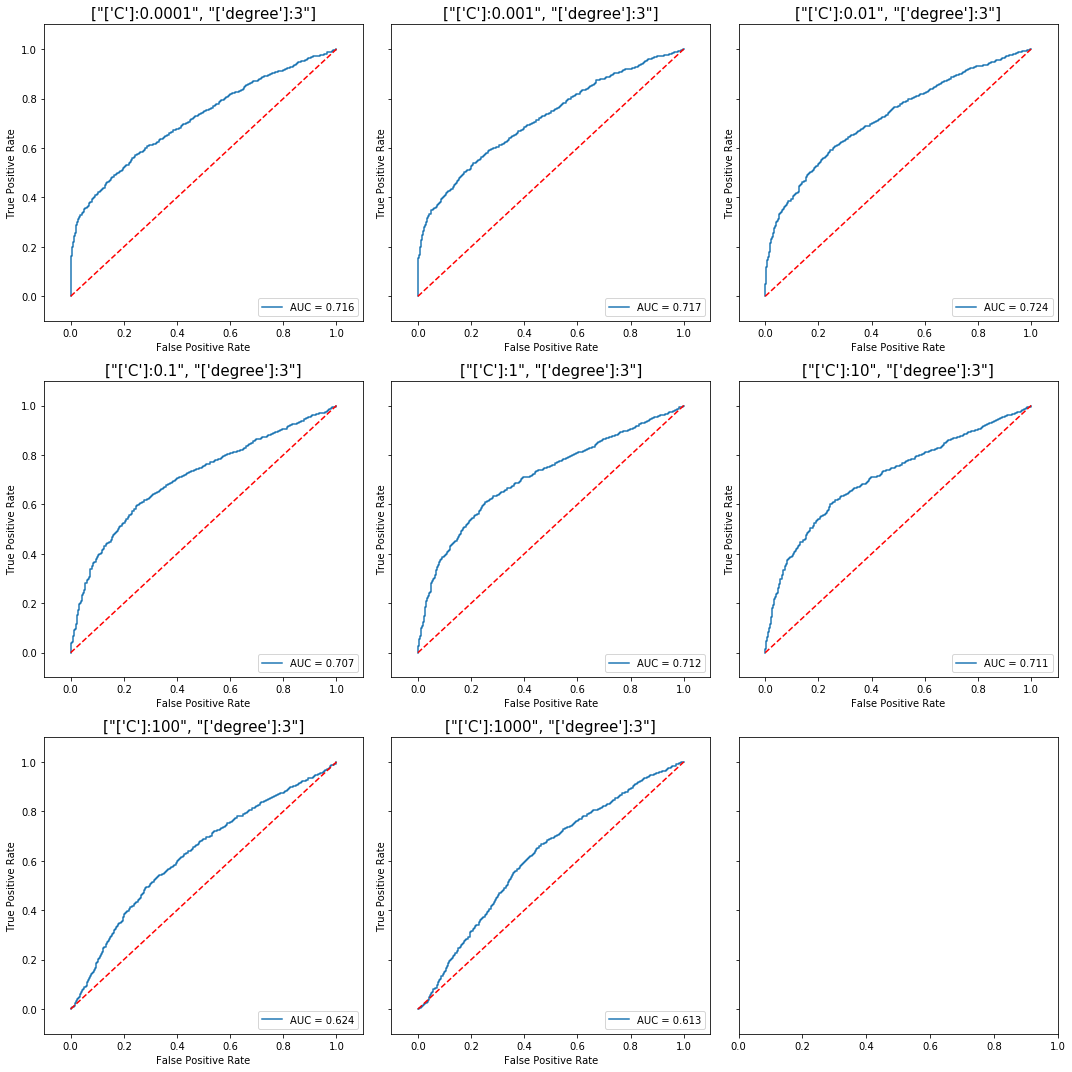

CPU times: user 13.1 s, sys: 1.34 s, total: 14.4 s
Wall time: 13.1 s


In [24]:
%%time
num_cols = 3
num_rows = math.ceil(len(ParameterGrid(param_grid3)) / num_cols)

# create a single figure
plt.clf()
fig,axes = plt.subplots(num_rows,num_cols,sharey=True)
fig.set_size_inches(num_cols*5,num_rows*5)

for i,g in enumerate(ParameterGrid(param_grid3)):

    pipeline.set_params(**g)
    pipeline.fit(X_train,y_train)

    y_preds = pipeline.decision_function(X_test)
    
    # fpr means false-positive-rate
    # tpr means true-positive-rate
    fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)

    auc_score = metrics.auc(fpr, tpr)

    ax = axes[i // num_cols, i % num_cols]

    # don't print the whole name or it won't fit
    ax.set_title(str([r"{}:{}".format(
        k.split('__')[1:],v) for k,v in g.items() if "gamma" not in k and "kernel" not in k]),fontsize=15)
    ax.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
    ax.legend(loc='lower right')

    # it's helpful to add a diagonal to indicate where chance 
    # scores lie (i.e. just flipping a coin)
    ax.plot([0,1],[0,1],'r--')

    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

plt.gcf().tight_layout()
plt.show()

## polynomial kernel, degree=4

In [25]:
param_grid4 = [
    {
        'clf__kernel': ['poly'],
        'clf__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'clf__degree':[4],
        'clf__gamma':['auto']
    }
]

<Figure size 432x288 with 0 Axes>

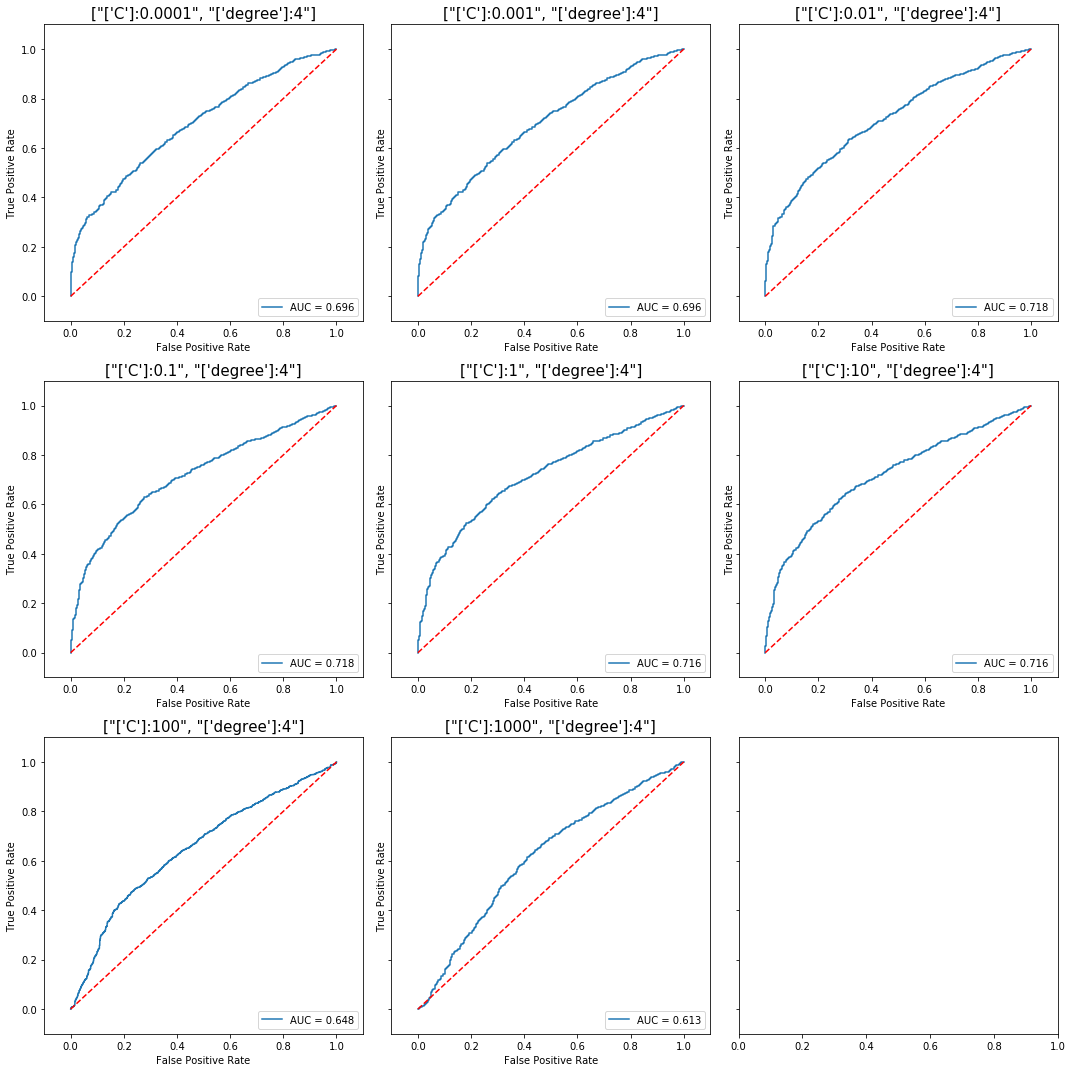

CPU times: user 13.2 s, sys: 1.38 s, total: 14.6 s
Wall time: 13.2 s


In [26]:
%%time
num_cols = 3
num_rows = math.ceil(len(ParameterGrid(param_grid4)) / num_cols)

# create a single figure
plt.clf()
fig,axes = plt.subplots(num_rows,num_cols,sharey=True)
fig.set_size_inches(num_cols*5,num_rows*5)

for i,g in enumerate(ParameterGrid(param_grid4)):

    pipeline.set_params(**g)
    pipeline.fit(X_train,y_train)

    y_preds = pipeline.decision_function(X_test)
    
    # fpr means false-positive-rate
    # tpr means true-positive-rate
    fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)

    auc_score = metrics.auc(fpr, tpr)

    ax = axes[i // num_cols, i % num_cols]

    # don't print the whole name or it won't fit
    ax.set_title(str([r"{}:{}".format(
        k.split('__')[1:],v) for k,v in g.items() if "gamma" not in k and "kernel" not in k]),fontsize=15)
    ax.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
    ax.legend(loc='lower right')

    # it's helpful to add a diagonal to indicate where chance 
    # scores lie (i.e. just flipping a coin)
    ax.plot([0,1],[0,1],'r--')

    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

plt.gcf().tight_layout()
plt.show()

## polynomial kernel, degree=5

In [27]:
param_grid5 = [
    {
        'clf__kernel': ['poly'],
        'clf__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'clf__degree':[5],
        'clf__gamma':['auto']
    }
]

<Figure size 432x288 with 0 Axes>

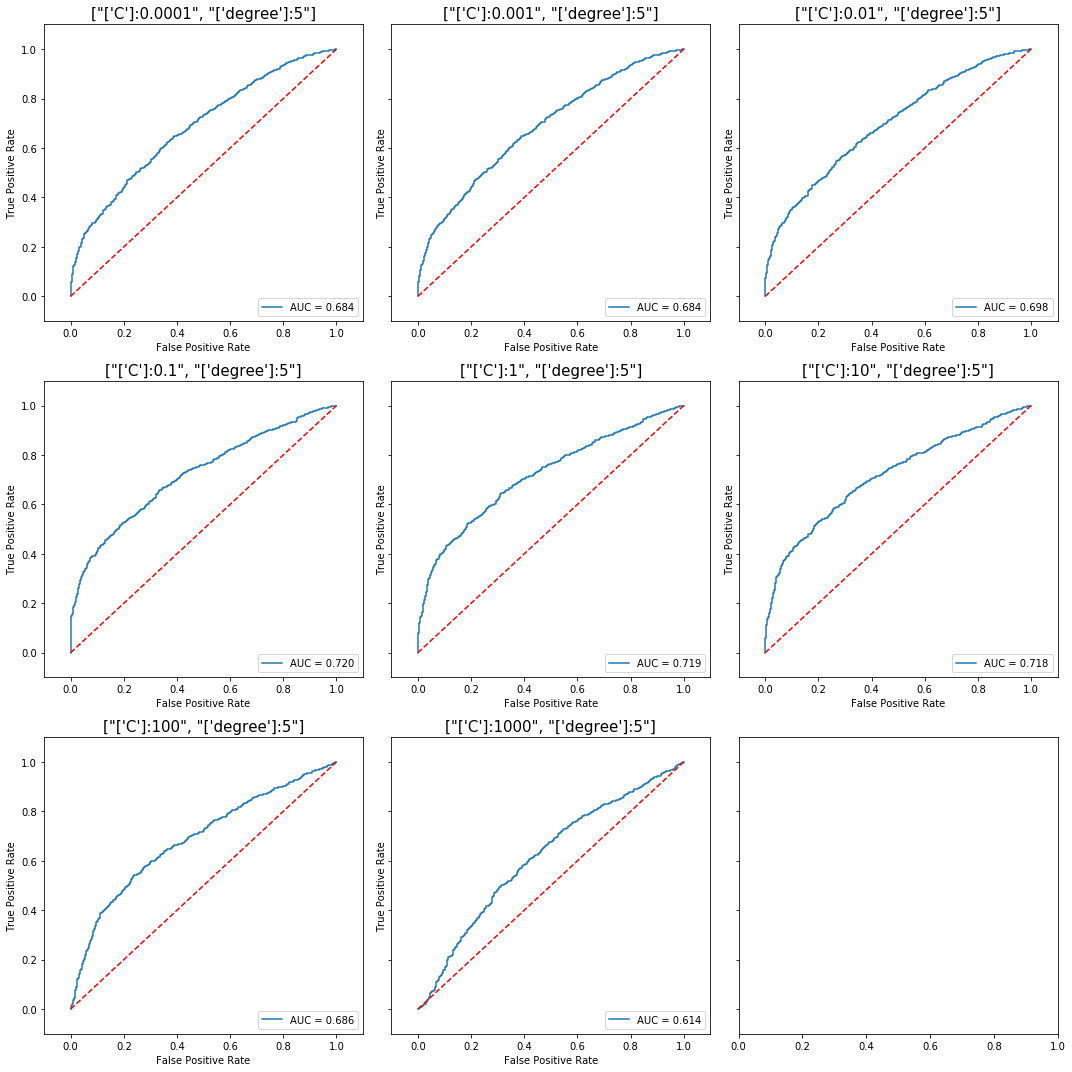

CPU times: user 12.5 s, sys: 1.36 s, total: 13.9 s
Wall time: 12.5 s


In [28]:
%%time
num_cols = 3
num_rows = math.ceil(len(ParameterGrid(param_grid5)) / num_cols)

# create a single figure
plt.clf()
fig,axes = plt.subplots(num_rows,num_cols,sharey=True)
fig.set_size_inches(num_cols*5,num_rows*5)

for i,g in enumerate(ParameterGrid(param_grid5)):

    pipeline.set_params(**g)
    pipeline.fit(X_train,y_train)

    y_preds = pipeline.decision_function(X_test)
    
    # fpr means false-positive-rate
    # tpr means true-positive-rate
    fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)

    auc_score = metrics.auc(fpr, tpr)

    ax = axes[i // num_cols, i % num_cols]

    # don't print the whole name or it won't fit
    ax.set_title(str([r"{}:{}".format(
        k.split('__')[1:],v) for k,v in g.items() if "gamma" not in k and "kernel" not in k]),fontsize=15)
    ax.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
    ax.legend(loc='lower right')

    # it's helpful to add a diagonal to indicate where chance 
    # scores lie (i.e. just flipping a coin)
    ax.plot([0,1],[0,1],'r--')

    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

plt.gcf().tight_layout()
plt.show()

## rbf kernel

In [18]:
param_grid6 = [
    {
        'clf__kernel': ['rbf'],
        'clf__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'clf__gamma':['auto']
    }
]

<Figure size 432x288 with 0 Axes>

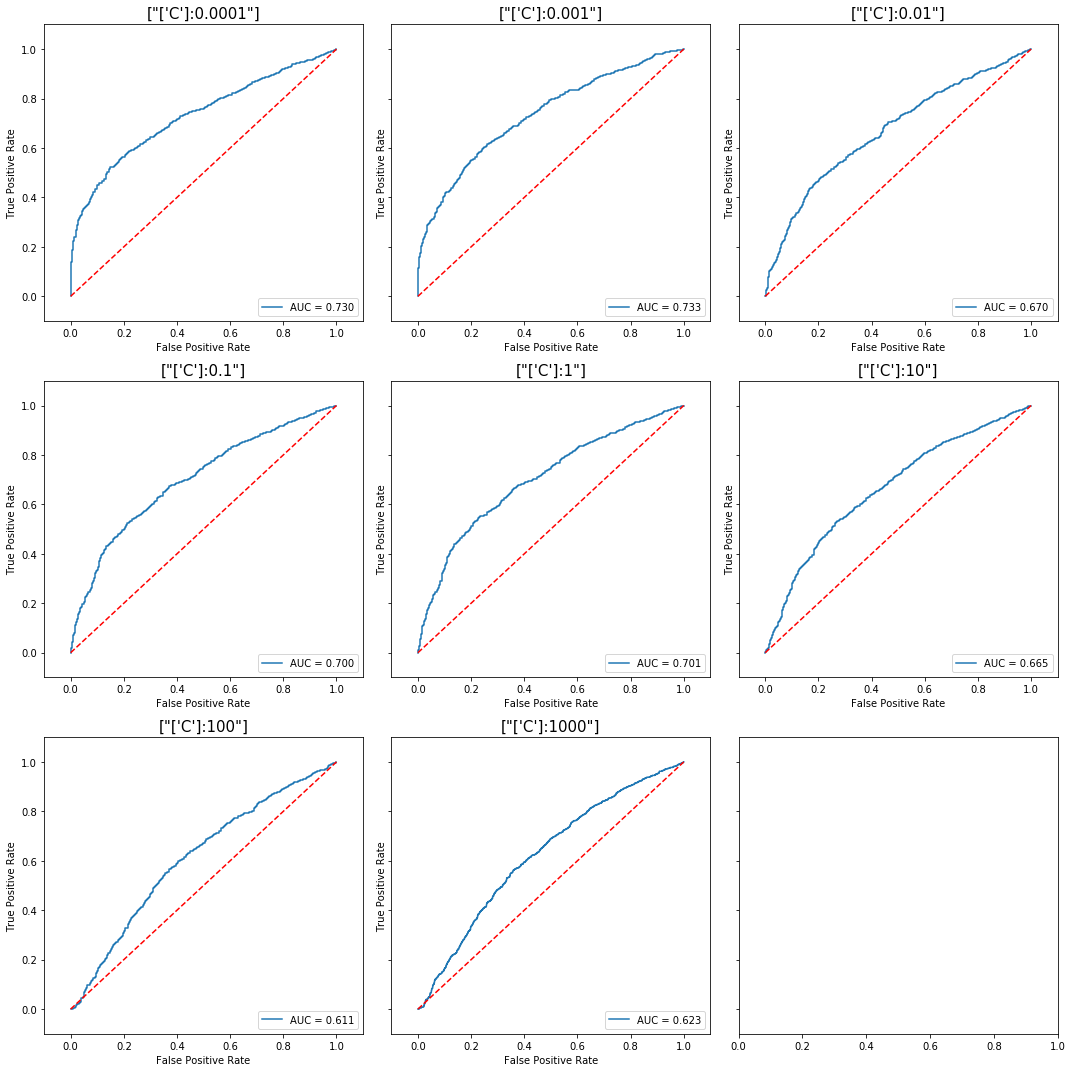

CPU times: user 26.3 s, sys: 1.44 s, total: 27.7 s
Wall time: 26.4 s


In [29]:
%%time
num_cols = 3
num_rows = math.ceil(len(ParameterGrid(param_grid6)) / num_cols)

# create a single figure
plt.clf()
fig,axes = plt.subplots(num_rows,num_cols,sharey=True)
fig.set_size_inches(num_cols*5,num_rows*5)

for i,g in enumerate(ParameterGrid(param_grid6)):

    pipeline.set_params(**g)
    pipeline.fit(X_train,y_train)

    y_preds = pipeline.decision_function(X_test)
    
    # fpr means false-positive-rate
    # tpr means true-positive-rate
    fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)

    auc_score = metrics.auc(fpr, tpr)

    ax = axes[i // num_cols, i % num_cols]

    ax.set_title(str([r"{}:{}".format(
        k.split('__')[1:],v) for k,v in g.items() if "gamma" not in k and "kernel" not in k]),fontsize=15)
    ax.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
    ax.legend(loc='lower right')

    # it's helpful to add a diagonal to indicate where chance 
    # scores lie (i.e. just flipping a coin)
    ax.plot([0,1],[0,1],'r--')

    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

plt.gcf().tight_layout()
plt.show()